In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
data = pd.read_csv('D:\coding\ml\stock-price-predictor\src\components\data\AAPL_stock_data.csv')

# Use only the 'Close' price for prediction to keep it simple
close_prices = data[['Close']]

# Normalize the closing prices to range between 0 and 1 for LSTM model input
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices)

# Define a function to create the dataset with a sliding window for time series forecasting
def create_dataset(series, window_size=60):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size, 0])
        y.append(series[i + window_size, 0])
    return np.array(X), np.array(y)

# Use a window size of 60 days for historical input (roughly 3 months of trading data)
window_size = 60
X, y = create_dataset(scaled_close_prices, window_size)

# Reshape X for LSTM: (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Prediction of the next closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
model.summary()


c:\Users\aumpa\anaconda3\envs\stockenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Train the model with 20 epochs and a batch size of 32
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0520 - val_loss: 0.0181
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0053 - val_loss: 0.0074
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0038 - val_loss: 0.0075
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0036 - val_loss: 0.0030
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0030 - val_loss: 0.0024
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Predicted next day price: 218.3034210205078


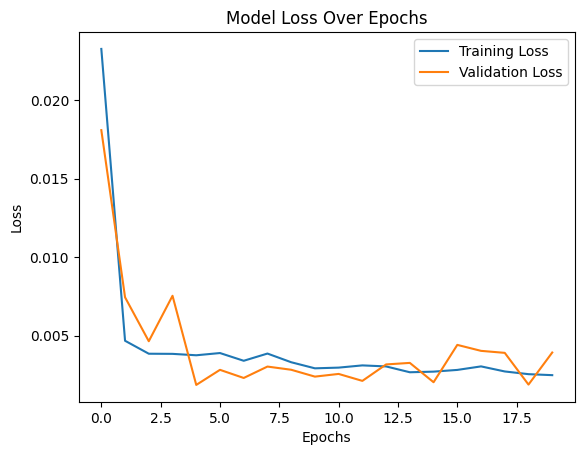

In [4]:
import matplotlib.pyplot as plt
# Use the last 60 days to make a prediction for the next day
last_sequence = scaled_close_prices[-window_size:]
last_sequence = np.reshape(last_sequence, (1, window_size, 1))

# Predict the next day's scaled price
next_day_prediction = model.predict(last_sequence)
# Inverse transform the scaled prediction to get actual price
next_day_price = scaler.inverse_transform(next_day_prediction)

# Print the predicted price
print(f"Predicted next day price: {next_day_price[0][0]}")

# Plotting the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
train_size = int(len(scaled_close_prices) * 0.8)
train_data = scaled_close_prices[:train_size]
test_data = scaled_close_prices[train_size - window_size:]

# Generate train and test sequences
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Reshape X for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [6]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0024 - val_loss: 0.0063
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0027 - val_loss: 0.0056
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# Predict on the test set
predicted_prices = model.predict(X_test)
predicted_prices_unscaled = scaler.inverse_transform(predicted_prices)
y_test_unscaled = scaler.inverse_transform([y_test])

# Calculate performance metrics
mse = mean_squared_error(y_test_unscaled[0], predicted_prices_unscaled[:, 0])
mae = mean_absolute_error(y_test_unscaled[0], predicted_prices_unscaled[:, 0])
r2 = r2_score(y_test_unscaled[0],predicted_prices_unscaled[:,0])

print(f"Mean Squared Error on Test Set: {mse}")
print(f"Mean Absolute Error on Test Set: {mae}")
print(f"r2 on Test Set: {r2}")



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Mean Squared Error on Test Set: 31.359059739538232
Mean Absolute Error on Test Set: 4.557203868078808
r2 on Test Set: 0.9307582733148853


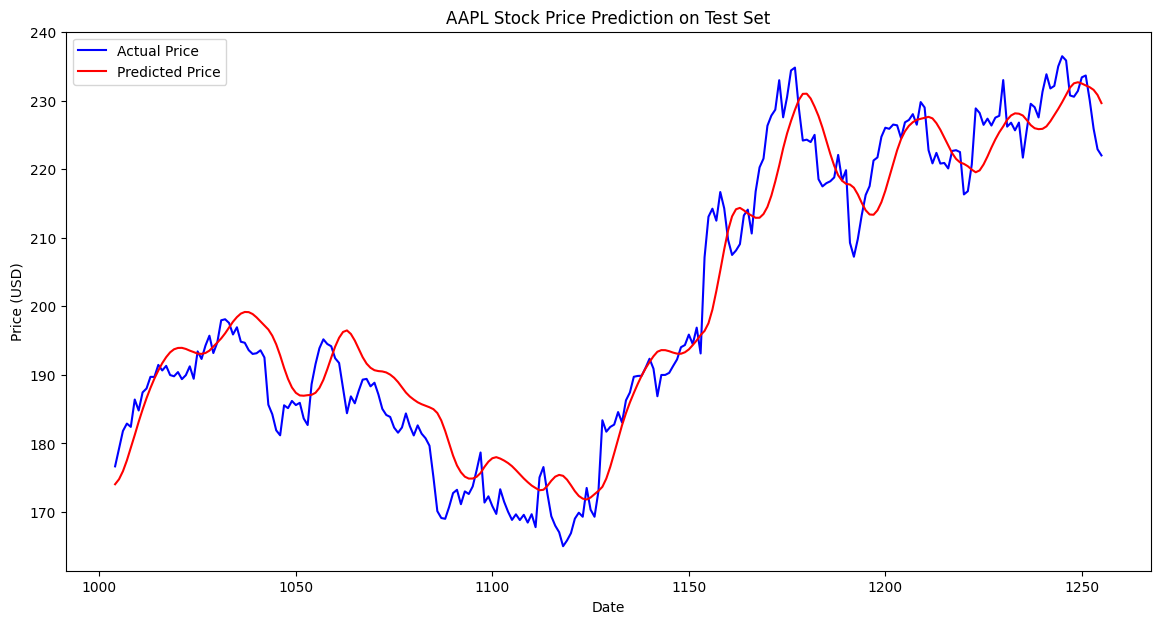

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size:], y_test_unscaled[0], color='blue', label='Actual Price')
plt.plot(data.index[train_size:], predicted_prices_unscaled, color='red', label='Predicted Price')
plt.title('AAPL Stock Price Prediction on Test Set')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

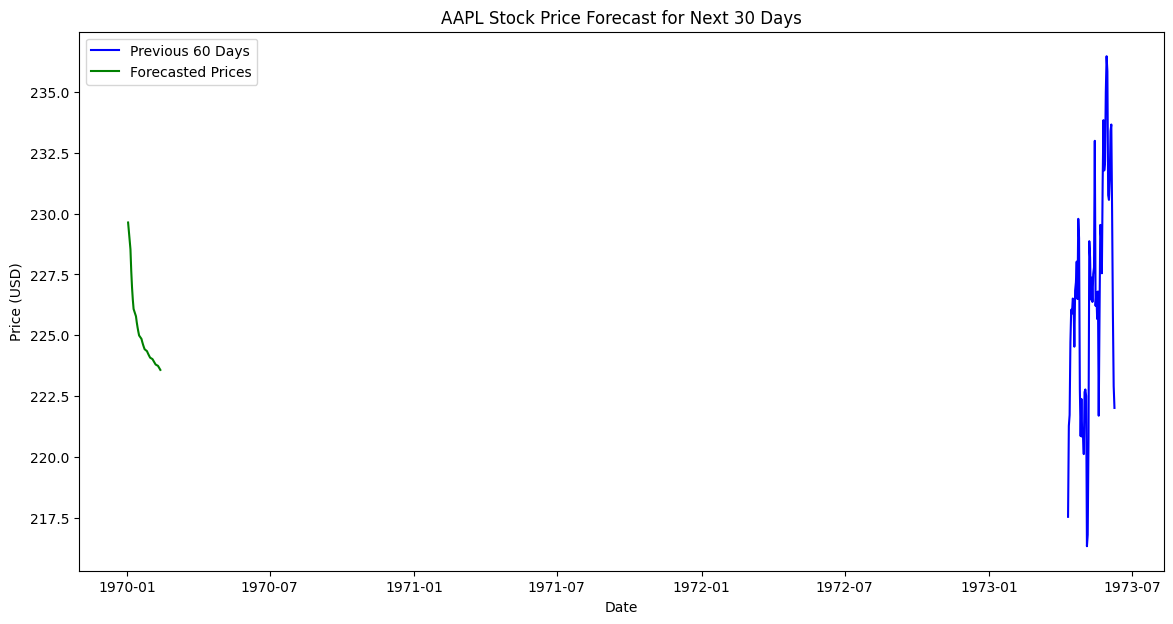

In [10]:
forecast_days = 30
forecasted_prices = []

# Start with the last sequence in the test set
last_sequence = X_test[-1]

for _ in range(forecast_days):
    next_price = model.predict(last_sequence.reshape(1, window_size, 1))
    forecasted_prices.append(next_price[0, 0])
    # Update sequence: drop the first price and add the predicted price at the end
    last_sequence = np.append(last_sequence[1:], next_price, axis=0)

# Inverse transform forecasted prices to original scale
forecasted_prices_unscaled = scaler.inverse_transform(np.array(forecasted_prices).reshape(-1, 1))

# Plot the forecasted future prices
plt.figure(figsize=(14, 7))
plt.plot(data.index[-60:], close_prices[-60:], color='blue', label='Previous 60 Days')
# Generate dates without using 'closed' argument
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_days + 1, freq='B')[1:]  # 'B' for business day frequency
plt.plot(forecast_dates, forecasted_prices_unscaled, color='green', label='Forecasted Prices')
plt.title(f'AAPL Stock Price Forecast for Next {forecast_days} Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()